# ALY6140 Capstone Project: Real Estate Sales by Town in State of Connecticut
#### Xinran Wang 10/12/2018

## Project description
### in this project, I am going to introduce the data of Real Estate Sales By Town for 2011, 2012, 2013, 2014 in Connecticut.
### The Office of Policy and Management maintains a listing of all real estate sales with a sales price of 2,000 or greater that occur between October 1 and September 30 of each year. For each sale record, the file includes: town, property address, date of sale, property type (residential, apartment, commercial, industrial or vacant land), sales price, and property assessment

### For the first step, import the web dataset into Python and clean up the dataset

In [ ]:
#import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
#download the dataset
data = pd.read_csv('https://data.ct.gov/api/views/8udc-aepg/rows.csv?accessType=DOWNLOAD')
print(data.head())

         Name  SerialNbr  ListYear DateRecorded  AssessedValue  SalePrice  \
0  Bridgeport     110682      2011   03/08/2012       162040.0   233500.0   
1     Ledyard     120059      2012   01/16/2013        67830.0    75000.0   
2     Milford      12497      2012   05/31/2013       201300.0   255000.0   
3   New Haven     110828      2011   07/30/2012        49630.0    39900.0   
4   Colebrook      11007      2011   05/14/2012       196100.0   235000.0   

   AdditionalRemarks  SalesRatio  NonUseCode ResidentialType  \
0                NaN    0.693961         NaN               1   
1                0.0    0.904400         NaN               C   
2                0.0    0.789412         NaN               1   
3                NaN    1.243860        14.0               1   
4                NaN    0.834468         NaN               1   

   ResidentialUnits               Address  \
0                 1        144 HUGHES AVE   
1                 1      1742-3G ROUTE 12   
2                

/Users/kisekinokage/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
#show the null values of all columns
print(data.isnull().sum())

Name                   0
ListYear               0
AssessedValue          0
SalePrice              0
SalesRatio             0
ResidentialType     6288
ResidentialUnits       0
dtype: int64


#### we can find a significant number of null values in the original dataset, I will select name, list year, assessed value sale price, sales ratio, residential type and residential units as the columns used in following analysis.

In [17]:
#select the columns we need
data=data.loc[:,['Name','ListYear','AssessedValue','SalePrice',
                   'SalesRatio','ResidentialType','ResidentialUnits']]

# drop the null vaules from the using columns 
print(data.head())
data.dropna()

         Name  ListYear  AssessedValue  SalePrice  SalesRatio ResidentialType  \
0  Bridgeport      2011       162040.0   233500.0    0.693961               1   
1     Ledyard      2012        67830.0    75000.0    0.904400               C   
2     Milford      2012       201300.0   255000.0    0.789412               1   
3   New Haven      2011        49630.0    39900.0    1.243860               1   
4   Colebrook      2011       196100.0   235000.0    0.834468               1   

   ResidentialUnits  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  


,Name,ListYear,AssessedValue,SalePrice,SalesRatio,ResidentialType,ResidentialUnits
0,Bridgeport,2011,162040.0,233500.0,0.693961,1,1
1,Ledyard,2012,67830.0,75000.0,0.904400,C,1
2,Milford,2012,201300.0,255000.0,0.789412,1,1
3,New Haven,2011,49630.0,39900.0,1.243860,1,1
4,Colebrook,2011,196100.0,235000.0,0.834468,1,1
5,Wethersfield,2012,128400.0,165000.0,0.778182,1,1
6,New Canaan,2012,857920.0,1176501.0,0.729213,1,1
7,East Hartford,2012,83800.0,120000.0,0.698333,C,1
8,Litchfield,2012,171320.0,238000.0,0.719832,1,1
9,Southbury,2011,125370.0,119000.0,1.053529,C,1


### Next, we find AssessedValue, SalePrice andSalesRatio to be the three important numerical columns, we will observe their correaltions first.
### Since the number of observations is large, it may take several minutes to run the visualization

/Users/kisekinokage/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


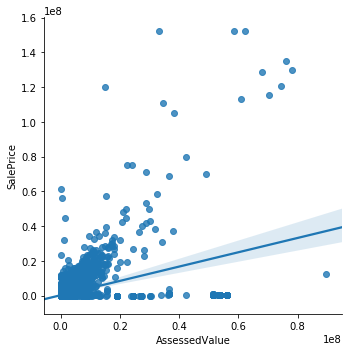

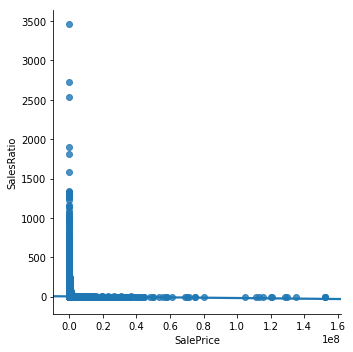

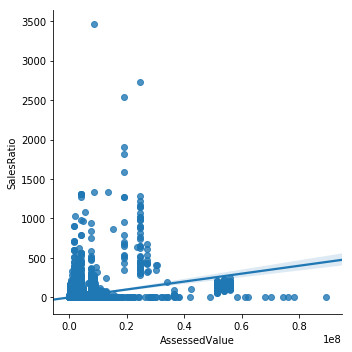

In [18]:
#visualize the corelation among AssessedValue SalePrice and SalesRatio using Seaborn line plot

#AssessedValue and SalePrice
sns.lmplot(x="AssessedValue", y="SalePrice",data=data)
#most values of SalePrice and AssessedValue center on less than 200000, they have a positive linear correlation

#SalePrice and SalesRatio
sns.lmplot(x="SalePrice", y="SalesRatio",data=data)
#the value distribution are equal, they do not have a significant correlation

#Assessedvalue and SalesRatio
sns.lmplot(x="AssessedValue", y="SalesRatio",data=data)
##the value distribution are equal, they have a weak positive linear correlation 

#### we generate the saleprice by year with the list year (2011~2014), find the mean of saleprice for each year, computing a line chart to compare the average saleprice

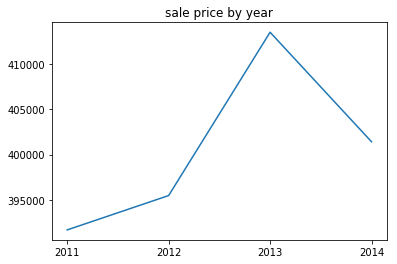

In [19]:
price_year =  data.loc[:,['SalePrice','ListYear']]
price = price_year.groupby('ListYear').mean()
price['year']=['2011','2012','2013','2014']
plt.title('sale price by year')
plt.plot(price['year'], price['SalePrice'])
plt.show()
# year 2013 has the largest average saleprice

#### apply the same methodology to AssessedValue and SalesRatio

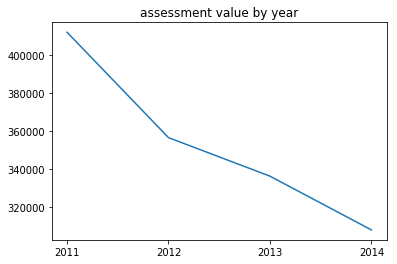

In [20]:
value_year = data.loc[:,['AssessedValue','ListYear']]
value = value_year.groupby('ListYear').mean()
value['year']=['2011','2012','2013','2014']
plt.title('assessment value by year')
plt.plot(value['year'], value['AssessedValue'])
plt.show()
# we observe that from year 2011 to 2014, average AssessedValue has a significant decreasing tread

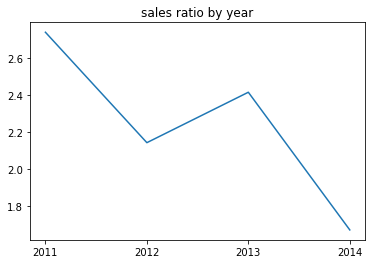

In [21]:
ratio_year = data.loc[:,['SalesRatio','ListYear']]
ratio = ratio_year.groupby('ListYear').mean()
ratio['year']=['2011','2012','2013','2014']
plt.title('sales ratio by year')
plt.plot(ratio['year'], ratio['SalesRatio'])
plt.show()
# we observe year 2011 has the largest sales ratio, where year 2014 has the least, this is the same as assessed value

### Then we will use linear regression to generate the mean square to find the predicative correlation among AssessedValue, SalesRatio and SalePrice

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import train_test_split

/Users/kisekinokage/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
x=data.SalePrice
y=data.SalesRatio
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)
model = smf.OLS(y_train,x_train)
result = model.fit()
yhat = result.predict(x_test) 
mse_error = np.mean((yhat-y_test) ** 2)
print('mse_error:',mse_error)
# large mean square error indicates that sale price does not predicate sales ratio well

mse_error: 852.0572460549857


In [24]:
x=data.AssessedValue
y=data.SalesRatio
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)
model = smf.OLS(y_train,x_train)
result = model.fit()
yhat = result.predict(x_test) 
mse_error = np.mean((yhat-y_test) ** 2)
print('mse_error:',mse_error)
# assessed value shows a relatively better result of predicting sales ratio compared with sale price

mse_error: 607.4712278605434


In [25]:
x=data.AssessedValue
y=data.SalePrice
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)
model = smf.OLS(y_train,x_train)
result = model.fit()
yhat = result.predict(x_test) 
mse_error = np.mean((yhat-y_test) ** 2)
print('mse_error:',mse_error)
# this number indicates that assessed value does not have any predicative correlation with sale price

mse_error: 1733205131295.208


# Conclusion
## 1. From the year 2011 to 2014, assessed value has a positive linear relation with sale price, but assessed value can not predicate the trend of future sale price.
## 2. From the year 2011 to 2014, sales ratio has no linear relation with sale price, it either shows a weak predicative relation with the sale price.
## 3. From the year 2011 to 2014, sales ratio has a relatively weak linear relation with assessed value, but it either shows a stronger predicative relation with the sales ratio compared with sale price.
## 4. From the year 2011 to 2014, both sales ratio and assessed value has a decreasing trend, only saleprice is unsteadily increasing.